In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from glob import glob 
from datetime import datetime 
%matplotlib inline 

In [69]:
filename = glob("./data/raw/*.csv")
life = filename[1] 
pcr = filename[2] 
pcr_test = filename[4] 
employ = filename[5] 

life = pd.read_csv(life)
pcr = pd.read_csv(pcr)
pcr_test = pd.read_csv(pcr_test)
employ = pd.read_csv(employ)

In [5]:
life.head()

,日付,貸付申請件数,累計貸付申請件数,貸付決定件数,累計貸付決定件数,貸付決定額,累計貸付決定額
0,3/25~8/21,2743221,2743221,2641615,2641615,11451.68066,11451.68066
1,8/22~8/28,28449,2771670,33050,2674665,142.99739,11594.67805
2,8/29~9/4,20438,2792108,37810,2712475,168.17183,11762.84988


In [6]:
pcr.head()

,日付,国立感染症研究所,検疫所,地方衛生研究所・保健所,民間検査会社（主に行政検査）,大学等,医療機関,小計,民間検査会社（主に自費検査）,計
0,2020/2/18,472,75,398,0,79,NaN,1024,NaN,1024
1,2020/2/19,15,68,609,0,0,NaN,692,NaN,692
2,2020/2/20,20,15,758,0,0,NaN,793,NaN,793
3,2020/2/21,261,188,902,132,108,NaN,1591,NaN,1591
4,2020/2/22,341,127,677,2,19,NaN,1166,NaN,1166


In [7]:
pcr_test.head()

,日付,PCR 検査実施件数(単日)
0,2020/2/5,4.0
1,2020/2/6,19.0
2,2020/2/7,9.0
3,2020/2/8,4.0
4,2020/2/9,10.0


In [8]:
employ.head()

,日付,支給申請件数,累計支給申請件数,支給決定件数,累計支給決定件数,支給決定額,累計支給決定額
0,~4/17,985,985,60,60,0.25,0.25
1,4/18~4/24,1556,2541,222,282,1.17,1.42
2,4/25~5/1,2578,5119,240,522,1.43,2.84
3,5/2~5/8,5415,10534,2565,3087,7.74,10.59
4,5/9~5/15,11058,21592,6171,9258,29.44,40.03


In [77]:
employ = employ[["日付", "支給申請件数", "支給決定件数", "支給決定額"]]
employ = employ.loc[38:, :] # 2020年を除く
employ["first"] = employ["日付"].apply(lambda x: "2021/"+x.split("~")[0])
employ["end"] = employ["日付"].apply(lambda x: "2021/"+x.split("~")[1])
employ.drop("日付", axis=1, inplace=True)

employ["first"] = employ['first'].apply(lambda _: datetime.strptime(_,"%Y/%m/%d"))
employ["end"] = employ['end'].apply(lambda _: datetime.strptime(_,"%Y/%m/%d"))
employ["first"] = pd.to_datetime(employ["first"])
employ["end"] = pd.to_datetime(employ["end"])


In [98]:
employ = employ.reset_index()
for i, (f, e) in enumerate(zip(employ["first"].tolist(), employ["end"].tolist())):
    date = pd.date_range(start=f, end=e)
    if i == 0:
        s = pd.DataFrame({"employ_apply": employ.loc[i, "支給申請件数"], 
                         "employ_decision": employ.loc[i, "支給決定件数"], 
                         "employ_cnt": employ.loc[i, "支給決定額"]}, index=date)
    else:
        s_ =  pd.DataFrame({"employ_apply": employ.loc[i, "支給申請件数"], 
                         "employ_decision": employ.loc[i, "支給決定件数"], 
                         "employ_cnt": employ.loc[i, "支給決定額"]}, index=date)
        s = pd.concat([s, s_])
s.head()

,employ_apply,employ_decision,employ_cnt
2021-01-02,63008,57385,558.170000
2021-01-03,63008,57385,558.170000
2021-01-04,63008,57385,558.170000
2021-01-05,63008,57385,558.170000
2021-01-06,63008,57385,558.170000
...,...,...,...
2021-08-30,78387,74588,620.210614
2021-08-31,78387,74588,620.210614
2021-09-01,78387,74588,620.210614
2021-09-02,78387,74588,620.210614


In [71]:
life["first"] = life['first'].apply(lambda _: datetime.strptime(_,"%Y/%m/%d"))
life["end"] = life['end'].apply(lambda _: datetime.strptime(_,"%Y/%m/%d"))
life["first"] = pd.to_datetime(life["first"])
life["end"] = pd.to_datetime(life["end"])
life["cnt"] = life["end"] - life["first"] 
life

,貸付申請件数,貸付決定件数,貸付決定額,first,end,cnt
0,2743221,2641615,11451.68066,2021-03-25,2021-08-21,149 days
1,28449,33050,142.99739,2021-08-22,2021-08-28,6 days
2,20438,37810,168.17183,2021-08-29,2021-09-04,6 days


In [72]:
x1 = pd.date_range(start="2021-03-25", end="2021-08-12")
x_0 = pd.DataFrame({"life_cnt_apply": life.loc[0, "貸付申請件数"], 
                 "life_cnt": life.loc[0, "貸付決定件数"], 
                 "life_decision": life.loc[0, "貸付決定額"]}, index=x1)
x1 = pd.date_range(start="2021-08-22", end="2021-08-28")
x_1 = pd.DataFrame({"life_cnt_apply": life.loc[1, "貸付申請件数"], 
                 "life_cnt": life.loc[1, "貸付決定件数"], 
                 "life_decision": life.loc[1, "貸付決定額"]}, index=x1)
x1 = pd.date_range(start="2021-08-29", end="2021-09-04")
x_2 = pd.DataFrame({"life_cnt_apply": life.loc[2, "貸付申請件数"], 
                 "life_cnt": life.loc[2, "貸付決定件数"], 
                 "life_decision": life.loc[2, "貸付決定額"]}, index=x1)

life = pd.concat([x_0, x_1, x_2])
life.head()

,life_cnt_apply,life_cnt,life_decision
2021-03-25,2743221,2641615,11451.68066
2021-03-26,2743221,2641615,11451.68066
2021-03-27,2743221,2641615,11451.68066
2021-03-28,2743221,2641615,11451.68066
2021-03-29,2743221,2641615,11451.68066


In [102]:
pcr = pcr[["日付", "計"]]
pcr["日付"] = pd.to_datetime(pcr["日付"])
pcr.columns = ["datetime", "pcr_cnt"]
pcr = pcr.set_index("datetime")
pcr.head()

,pcr_cnt
datetime,
2020-02-18,1024
2020-02-19,692
2020-02-20,793
2020-02-21,1591
2020-02-22,1166


In [101]:
pcr_test["日付"] = pd.to_datetime(pcr_test["日付"])
pcr_test.columns = ["datetime", "pcr_test_cnt"]
pcr_test = pcr_test.set_index("datetime")
pcr_test.head() 

,pcr_test_cnt
datetime,
2020-02-05,4.0
2020-02-06,19.0
2020-02-07,9.0
2020-02-08,4.0
2020-02-09,10.0


In [109]:
pcr_test["pcr_test_cnt"] = pcr_test.pcr_test_cnt.fillna(pcr_test.pcr_test_cnt.mean())

In [118]:
df_1 = pd.merge(s, life, how="outer", left_index=True, right_index=True)
df_2 = pd.merge(df_1, pcr_test, how="outer", left_index=True, right_index=True)
df_3 = pd.merge(df_2, pcr, how="outer", left_index=True, right_index=True)
df = df_3 
df = df[df.index >= "2021-01-01"]
df.head()

,employ_apply,employ_decision,employ_cnt,life_cnt_apply,life_cnt,life_decision,pcr_test_cnt,pcr_cnt
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,25072.0,18692.0
2021-01-02,63008.0,57385.0,558.17,NaN,NaN,NaN,8746.0,20213.0
2021-01-03,63008.0,57385.0,558.17,NaN,NaN,NaN,20291.0,23404.0
2021-01-04,63008.0,57385.0,558.17,NaN,NaN,NaN,84338.0,57970.0
2021-01-05,63008.0,57385.0,558.17,NaN,NaN,NaN,88446.0,83265.0


In [120]:
df.to_csv("./data/processed/optinal_info.csv")

<AxesSubplot:xlabel='datetime'>

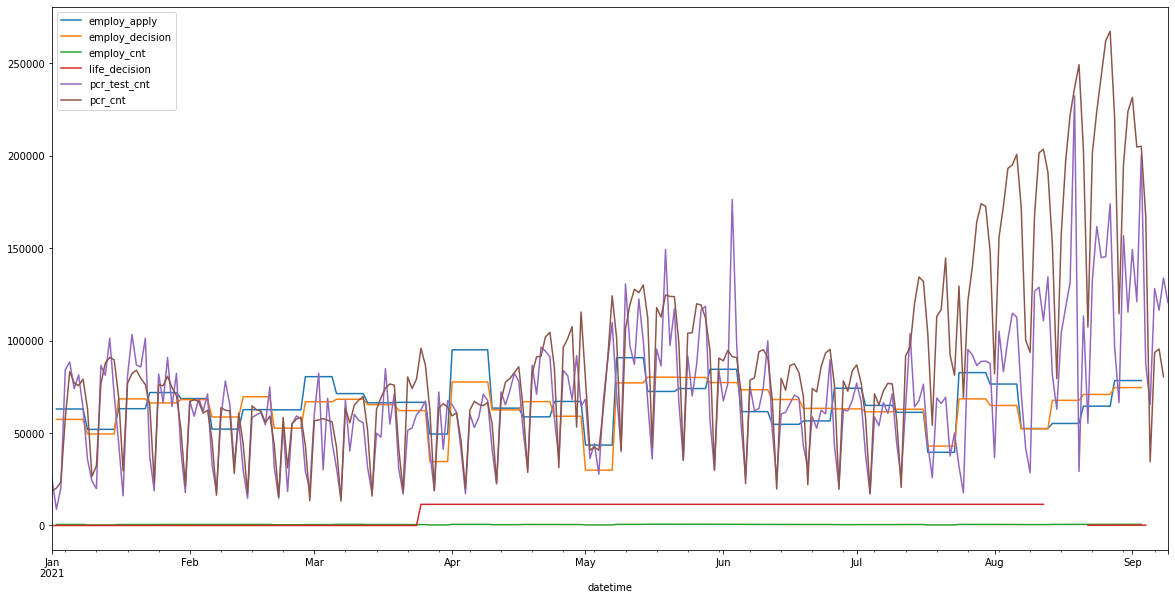

In [31]:
df = pd.read_csv("./data/processed/optinal_info.csv")
df["Unnamed: 0"] = pd.to_datetime(df["Unnamed: 0"])
df = df.set_index("Unnamed: 0")
df.index.name = "datetime"
df.drop(["life_cnt_apply", "life_cnt"], axis=1).plot(figsize=(20,10))

In [15]:
df.isnull().sum() / df.shape[0]

employ_apply       0.027778
employ_decision    0.027778
employ_cnt         0.027778
life_cnt_apply     0.055556
life_cnt           0.055556
life_decision      0.055556
pcr_test_cnt       0.000000
pcr_cnt            0.003968
dtype: float64

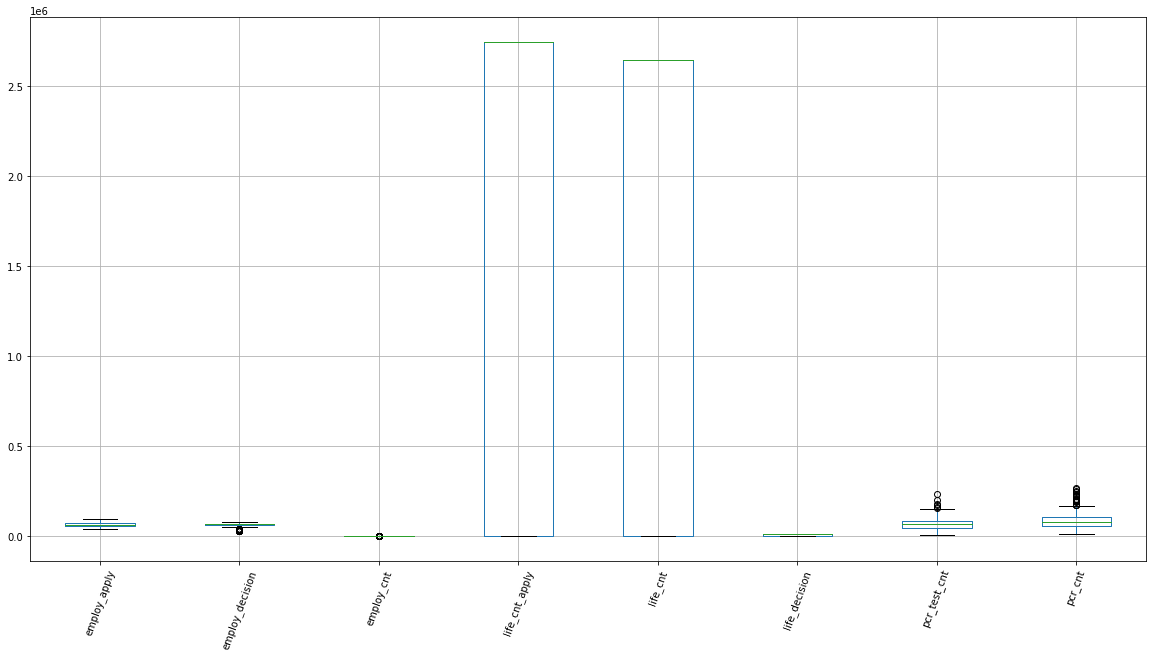

In [20]:
df.boxplot(figsize=(20, 10))
plt.xticks(rotation=70)
plt.show()

In [32]:
cols = df.columns
for col in cols:
    df[col] = df[col].fillna(df[col].mean())
df.isnull().sum()

employ_apply       0
employ_decision    0
employ_cnt         0
life_cnt_apply     0
life_cnt           0
life_decision      0
pcr_test_cnt       0
pcr_cnt            0
dtype: int64

In [74]:
newly = pd.read_csv("./data/processed/newly.csv")
newly["datetime"] = pd.to_datetime(newly["datetime"])
newly = newly.set_index("datetime")
train = pd.merge(newly, df, how="outer", left_index=True, right_index=True)
train.head()

,Newly confirmed cases,Requiring inpatient care,Discharged from hospital or released from treatment,To be confirmed,Deaths(Cumulative),Severe cases,employ_apply,employ_decision,employ_cnt,life_cnt_apply,life_cnt,life_decision,pcr_test_cnt,pcr_cnt
datetime,,,,,,,,,,,,,,
2021-01-01,6496,74374.0,389151.0,2720.0,7026.0,1422.0,66160.436735,64153.020408,525.732479,0.0,0.0,0.0,25072,18692.0
2021-01-02,6114,76062.0,393237.0,2686.0,7094.0,1428.0,63008.000000,57385.000000,558.170000,0.0,0.0,0.0,8746,20213.0
2021-01-03,6278,77458.0,397599.0,2586.0,7196.0,1462.0,63008.000000,57385.000000,558.170000,0.0,0.0,0.0,20291,23404.0
2021-01-04,6660,79810.0,403063.0,2100.0,7308.0,1542.0,63008.000000,57385.000000,558.170000,0.0,0.0,0.0,84338,57970.0
2021-01-05,9916,81816.0,410275.0,1818.0,7436.0,1568.0,63008.000000,57385.000000,558.170000,0.0,0.0,0.0,88446,83265.0


In [38]:
train.isnull().sum()

Newly confirmed cases                                  0
Requiring inpatient care                               0
Discharged from hospital or released from treatment    0
To be confirmed                                        0
Deaths(Cumulative)                                     0
Severe cases                                           0
employ_apply                                           0
employ_decision                                        0
employ_cnt                                             0
life_cnt_apply                                         0
life_cnt                                               0
life_decision                                          0
pcr_test_cnt                                           0
pcr_cnt                                                0
dtype: int64

In [76]:
train["target"] = train["Newly confirmed cases"].shift(-1).fillna(0)
train["target"] = train["target"].astype(int)
train.head()

,Newly confirmed cases,Requiring inpatient care,Discharged from hospital or released from treatment,To be confirmed,Deaths(Cumulative),Severe cases,employ_apply,employ_decision,employ_cnt,life_cnt_apply,life_cnt,life_decision,pcr_test_cnt,pcr_cnt,emergency,holiday,target
datetime,,,,,,,,,,,,,,,,,
2021-01-01,6496,74374.0,389151.0,2720.0,7026.0,1422.0,66160.436735,64153.020408,525.732479,0.0,0.0,0.0,25072,18692.0,1,0,6114
2021-01-02,6114,76062.0,393237.0,2686.0,7094.0,1428.0,63008.000000,57385.000000,558.170000,0.0,0.0,0.0,8746,20213.0,1,0,6278
2021-01-03,6278,77458.0,397599.0,2586.0,7196.0,1462.0,63008.000000,57385.000000,558.170000,0.0,0.0,0.0,20291,23404.0,1,0,6660
2021-01-04,6660,79810.0,403063.0,2100.0,7308.0,1542.0,63008.000000,57385.000000,558.170000,0.0,0.0,0.0,84338,57970.0,1,0,9916
2021-01-05,9916,81816.0,410275.0,1818.0,7436.0,1568.0,63008.000000,57385.000000,558.170000,0.0,0.0,0.0,88446,83265.0,1,0,12132


In [80]:
def emergency(x): # 緊急事態宣言
    if datetime(2021,1,8) and x <= datetime(2021,3,21):
        return 1
    elif datetime(2021,4,25) and x <= datetime(2021,6,20):
        return 1
    elif x >= datetime(2021,7,12):
        return 1 
    else: 
        return 0 
    
def holiday(x): # 祝日
    if x in ["2021-01-01", "2021-01-02", "2021-01-03", "2021-01-11", "2021-02-11", 
            "2021-02-23", "2021-03-20", "2021-04-29", "2021-05-03", "2021-05-04", 
            "2021-05-05", "2021-07-22", "2021-07-22", "2021-08-08", "2021-08-09"]:
        return 1
    else:
        return 0
train["datetime"] = train.index 
train["datetime"] = pd.to_datetime(train.datetime)
train["emergency"] = train.datetime.map(emergency)
train["holiday"] = train.datetime.map(holiday)
train["week"] = train.datetime.dt.dayofweek
train["holi"] = train.week.apply(lambda x: 1 if x == 5 or x == 6 else 0)
train["hol"] = train["holi"] + train["holiday"]
train["holiday"] = train.hol.apply(lambda x: 1 if x >= 1 else 0)

train.drop(["datetime","hol", "holi", "week"], axis=1, inplace=True)


In [84]:
train.to_csv("data/processed/train.csv")